<a href="https://colab.research.google.com/github/Mariyselita/CIP/blob/main/Tarea_9_Algoritmos_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from bs4 import BeautifulSoup

filepath = '/content/drive/My Drive/CIP/Datos/'

# Fallback encoding
def read_csv_with_fallback(filepath, filename):
    try:
        return pd.read_csv(filepath + filename, encoding='utf-8')
    except UnicodeDecodeError:
        return pd.read_csv(filepath + filename, encoding='latin1')

# Limpieza con BeautifulSoup
def clean_text(text):
    if isinstance(text, str):
        return BeautifulSoup(text, "html.parser").get_text().strip()
    return text

In [3]:
# Cargar datasets
ciclones_df = read_csv_with_fallback(filepath, 'Ciclones.csv')
clima_extremo_df = read_csv_with_fallback(filepath, 'Clima_Extremo.csv')
incendios_forestales_df = read_csv_with_fallback(filepath, 'Incendios_Forestales.csv')
sequias_df = read_csv_with_fallback(filepath, 'Sequías.csv')
sismos_df = read_csv_with_fallback(filepath, 'Sismos.csv')

# Limpieza de columnas
for df in [ciclones_df, clima_extremo_df, incendios_forestales_df, sequias_df, sismos_df]:
    for column in df.select_dtypes(include=[object]).columns:
        df[column] = df[column].apply(clean_text)


<ipython-input-2-102ba87b09e5>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text().strip()
<ipython-input-2-102ba87b09e5>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text().strip()
<ipython-input-2-102ba87b09e5>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text().strip()


## Ciclones

Gravedad
Baja        171
Media        60
Alta         52
Muy Alta      8
Name: count, dtype: int64


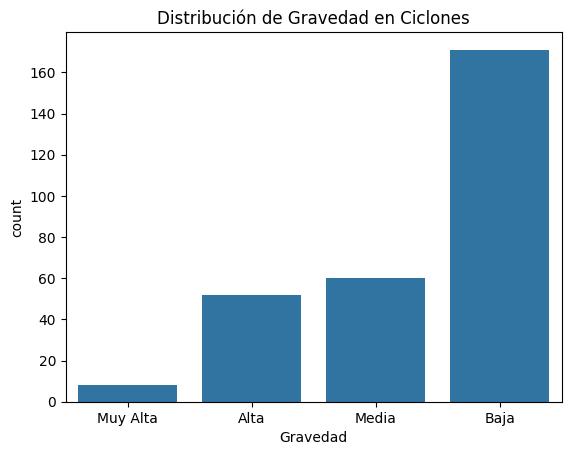

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Dia_Inicio       291 non-null    int64 
 1   Mes_Inicio       291 non-null    object
 2   Dia_Fin          291 non-null    int64 
 3   Mes_Fin          291 non-null    object
 4   Año              291 non-null    int64 
 5   Nombre           291 non-null    object
 6   Categoria        291 non-null    object
 7   Estado           291 non-null    object
 8   Vientos_Maximos  291 non-null    int64 
 9   Rachas           291 non-null    int64 
 10  Zona             291 non-null    object
 11  Clase            291 non-null    object
 12  Gravedad         291 non-null    object
dtypes: int64(5), object(8)
memory usage: 29.7+ KB


In [57]:
# Corregir los nombres de las columnas para ciclones
ciclones_df.columns = [
    'Dia_Inicio', 'Mes_Inicio', 'Dia_Fin', 'Mes_Fin', 'Año',
    'Nombre', 'Categoria', 'Estado', 'Vientos_Maximos', 'Rachas',
    'Zona', 'Clase', 'Gravedad'
]


# Ajustar la función de categorización según los nuevos valores encontrados
def categorizar_gravedad_ciclones(categoria):
    categoria = str(categoria).strip().upper()

    if 'TT' in categoria or 'DT' in categoria or 'TS' in categoria or 'TST' in categoria or 'PCT' in categoria or 'CTP' in categoria:
        return 'Baja'
    elif 'H1' in categoria or 'H2' in categoria:
        return 'Media'
    elif 'H3' in categoria or 'H4' in categoria:
        return 'Alta'
    elif 'H5' in categoria:
        return 'Muy Alta'
    else:
        return 'Desconocido'

# Aplicar la función a la columna 'Categoria'
ciclones_df['Gravedad'] = ciclones_df['Categoria'].apply(categorizar_gravedad_ciclones)

# Verificar la nueva distribución de la variable 'Gravedad'
print(ciclones_df['Gravedad'].value_counts())

# Función para ploteo de datos
def plot_gravedad(df, titulo):
    sns.countplot(x='Gravedad', data=df)
    plt.title(titulo)
    plt.show()

# Ploteo para Ciclones
plot_gravedad(ciclones_df, 'Distribución de Gravedad en Ciclones')

# Verificar la información del DataFrame
ciclones_df.info()

# Guardar el DataFrame modificado en un nuevo archivo CSV
ciclones_df.to_csv(filepath + 'Ciclones_Modificado.csv', index=False)


## Clima Extremo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Dia                     291 non-null    int64 
 1   Mes                     291 non-null    int64 
 2   Año                     291 non-null    int64 
 3   Estado                  291 non-null    object
 4   Tipo_Declaratoria       291 non-null    object
 5   Clasificacion_Fenomeno  291 non-null    object
 6   Tipo_Fenomeno           291 non-null    object
 7   Observaciones           291 non-null    object
 8   Clase                   291 non-null    object
 9   Gravedad                291 non-null    object
dtypes: int64(3), object(7)
memory usage: 22.9+ KB


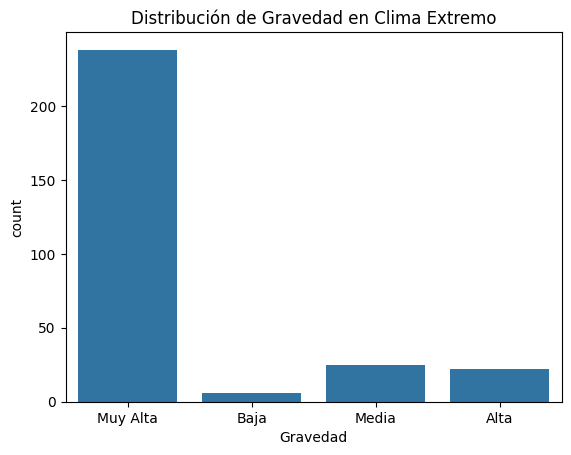

In [5]:
# Corregir los nombres de las columnas para clima extremo
clima_extremo_df.columns = [
    'Dia', 'Mes', 'Año', 'Estado', 'Tipo_Declaratoria',
    'Clasificacion_Fenomeno', 'Tipo_Fenomeno', 'Observaciones',
    'Clase', 'Gravedad'
]

clima_extremo_df.info()

# Categorizar basado en cuartiles de frecuencia de observaciones
frecuencias = clima_extremo_df['Observaciones'].value_counts()
cuartiles = pd.qcut(frecuencias, 4, labels=['Baja', 'Media', 'Alta', 'Muy Alta'])
mapeo_gravedad = {codigo: cuartiles[codigo] for codigo in frecuencias.index}
clima_extremo_df['Gravedad'] = clima_extremo_df['Observaciones'].map(mapeo_gravedad)

# Ploteo para Clima Extremo
plot_gravedad(clima_extremo_df, 'Distribución de Gravedad en Clima Extremo')

# Guardar el DataFrame modificado en un nuevo archivo CSV
clima_extremo_df.to_csv(filepath + 'Clima_Extremo_Modificado.csv', index=False)


## Incendios Forestales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Dia                     291 non-null    int64 
 1   Mes                     291 non-null    int64 
 2   Año                     291 non-null    int64 
 3   Estado                  291 non-null    object
 4   Tipo_Declaratoria       291 non-null    object
 5   Clasificacion_Fenomeno  291 non-null    object
 6   Observaciones           291 non-null    object
 7   Clase                   291 non-null    object
 8   Numero_de_Incendios     291 non-null    int64 
 9   Gravedad                291 non-null    object
dtypes: int64(4), object(6)
memory usage: 22.9+ KB


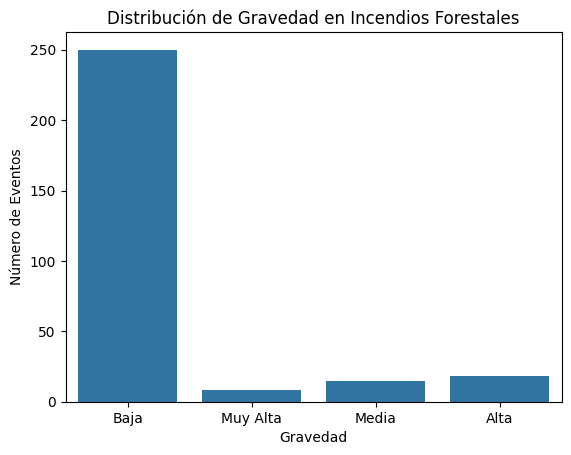

In [41]:
# Corregir los nombres de las columnas para incendios forestales
incendios_forestales_df.columns = [
    'Dia', 'Mes', 'Año', 'Estado', 'Tipo_Declaratoria',
    'Clasificacion_Fenomeno', 'Observaciones', 'Clase',
    'Numero_de_Incendios', 'Gravedad'
]

incendios_forestales_df.info()

# Función para categorizar gravedad basada en número de incendios
def categorizar_gravedad_incendios(num_incendios):
    if num_incendios ==0:
        return 'Baja'
    elif num_incendios <= 178:
        return 'Media'
    elif num_incendios <= 270:
        return 'Alta'
    else:
        return 'Muy Alta'

# Aplicar la función
incendios_forestales_df['Gravedad'] = incendios_forestales_df['Numero_de_Incendios'].apply(categorizar_gravedad_incendios)

# Ploteo para Incendios Forestales
plot_gravedad(incendios_forestales_df, 'Distribución de Gravedad en Incendios Forestales')

# Guardar el DataFrame modificado en un nuevo archivo CSV
incendios_forestales_df.to_csv(filepath + 'Incendios_Forestales_Modificado.csv', index=False)



## Sequías

Index(['Dia', 'Mes', 'Año', 'Estado', 'Municipio', 'Tipo_Declaratoria',
       'Clasificacion_Fenomeno', 'Tipo_Fenomeno', 'Fecha_Inicio', 'Fecha_Fin',
       'Observaciones'],
      dtype='object')
11
   Dia  Mes   Año   Estado       Municipio           Tipo_Declaratoria  \
0    6    1  2015  Morelos  Tlaquiltenango  Contingencia Climatológica   
1    6    1  2015  Morelos         Jojutla  Contingencia Climatológica   
2    6    1  2015  Morelos        Amacuzac  Contingencia Climatológica   
3    6    1  2015  Morelos         Cuautla  Contingencia Climatológica   
4    6    1  2015  Morelos           Ayala  Contingencia Climatológica   

  Clasificacion_Fenomeno Tipo_Fenomeno Fecha_Inicio   Fecha_Fin  \
0     Hidrometeorológico        Sequía   06/01/2015  31/10/2015   
1     Hidrometeorológico        Sequía   06/01/2015  31/10/2015   
2     Hidrometeorológico        Sequía   06/01/2015  31/10/2015   
3     Hidrometeorológico        Sequía   06/01/2015  31/10/2015   
4     Hidrometeorol

<ipython-input-7-6e2972dbeae2>:23: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sequias_df['Fecha_Fin'] = pd.to_datetime(sequias_df['Fecha_Fin'], errors='coerce')


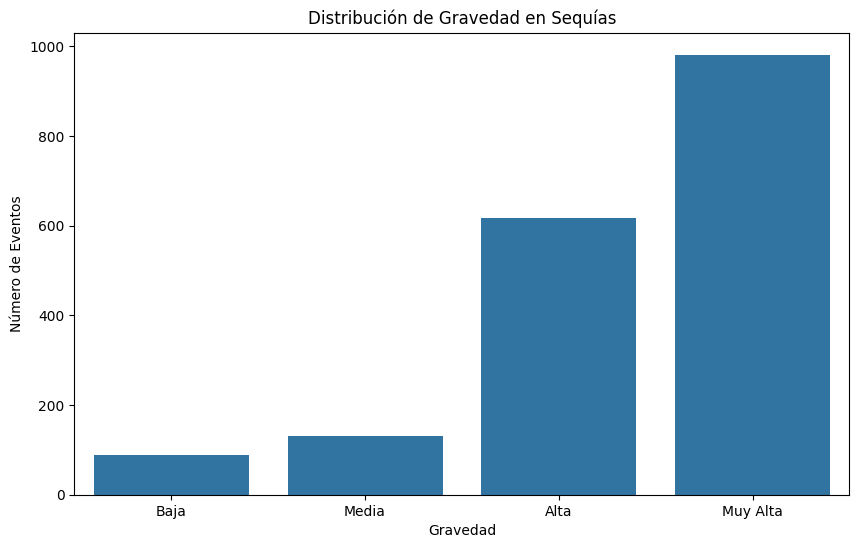

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Dia                     1817 non-null   int64         
 1   Mes                     1817 non-null   int64         
 2   Año                     1817 non-null   int64         
 3   Estado                  1817 non-null   object        
 4   Municipio               1817 non-null   object        
 5   Tipo_Declaratoria       1817 non-null   object        
 6   Clasificacion_Fenomeno  1817 non-null   object        
 7   Tipo_Fenomeno           1817 non-null   object        
 8   Fecha_Inicio            1817 non-null   datetime64[ns]
 9   Fecha_Fin               1817 non-null   datetime64[ns]
 10  Observaciones           1817 non-null   object        
 11  Duracion_Dias           1817 non-null   int64         
 12  Gravedad                1817 non-null   category

In [7]:
# Mostrar las columnas del DataFrame original
print(sequias_df.columns)
print(len(sequias_df.columns))  # Verificar el número de columnas

# Ajustar los nombres de las columnas para coincidir con el número de columnas en el DataFrame original
columnas_correctas = [
    'Dia', 'Mes', 'Año', 'Estado', 'Municipio', 'Tipo_Declaratoria',
    'Clasificacion_Fenomeno', 'Tipo_Fenomeno', 'Fecha_Inicio',
    'Fecha_Fin', 'Observaciones'
]

# Asignar los nombres corregidos a las columnas del DataFrame
sequias_df.columns = columnas_correctas

# Mostrar las primeras filas del DataFrame para asegurarse de que las columnas se nombraron correctamente
print(sequias_df.head())

# Mostrar las primeras filas del DataFrame para asegurarse de que las columnas se eliminaron correctamente
print(sequias_df.head())

# Convertir las fechas a formato datetime
sequias_df['Fecha_Inicio'] = pd.to_datetime(sequias_df['Fecha_Inicio'], errors='coerce')
sequias_df['Fecha_Fin'] = pd.to_datetime(sequias_df['Fecha_Fin'], errors='coerce')

# Calcular la duración en días
sequias_df['Duracion_Dias'] = (sequias_df['Fecha_Fin'] - sequias_df['Fecha_Inicio']).dt.days

# Verificar la duración calculada
print(sequias_df['Duracion_Dias'].describe())

# Definir categorías de gravedad basadas en la duración
bins = [0, 30, 90, 180, float('inf')]  # Duración en días
labels = ['Baja', 'Media', 'Alta', 'Muy Alta']
sequias_df['Gravedad'] = pd.cut(sequias_df['Duracion_Dias'], bins=bins, labels=labels)

# Verificar la nueva distribución de la variable 'Gravedad'
print(sequias_df['Gravedad'].value_counts())

# Función para ploteo de datos
def plot_gravedad(df, titulo):
    sns.countplot(x='Gravedad', data=df)
    plt.title(titulo)
    plt.xlabel('Gravedad')
    plt.ylabel('Número de Eventos')
    plt.show()

# Ploteo para Sequías
plt.figure(figsize=(10, 6))
plot_gravedad(sequias_df, 'Distribución de Gravedad en Sequías')

sequias_df.info()

# Guardar el DataFrame modificado en un nuevo archivo CSV
sequias_df.to_csv(filepath + 'Sequías_Modificado.csv', index=False)


## Sismos

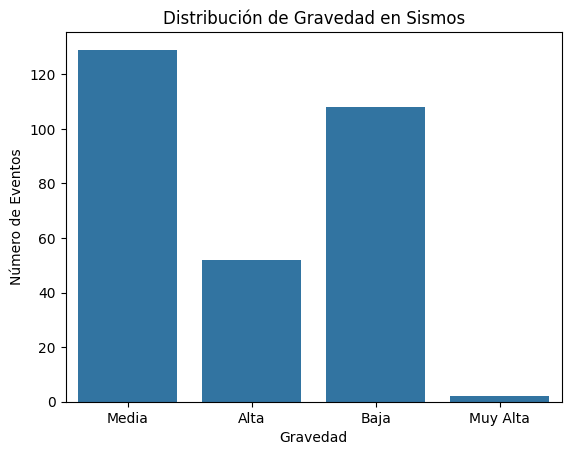

Gravedad
Media       129
Baja        108
Alta         52
Muy Alta      2
Name: count, dtype: int64


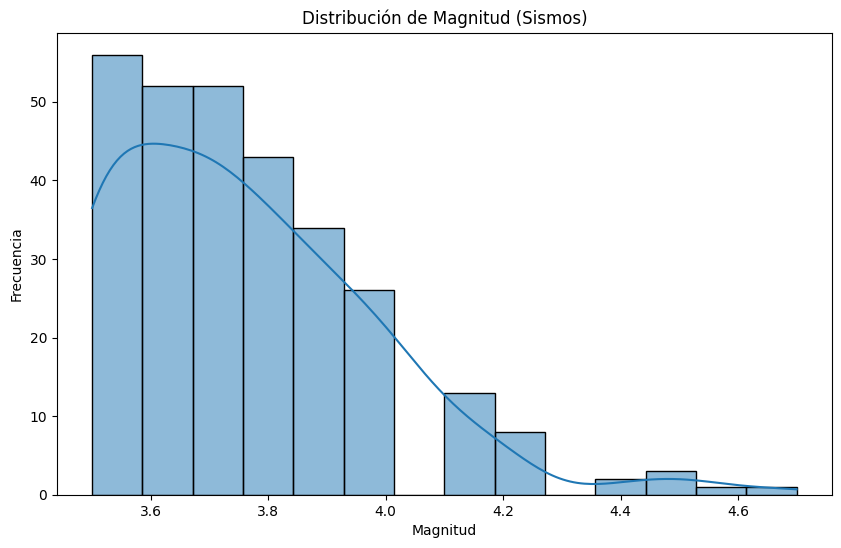

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dia          291 non-null    int64  
 1   Mes          291 non-null    int64  
 2   Año          291 non-null    int64  
 3   Magnitud     291 non-null    float64
 4   Latitud      291 non-null    float64
 5   Longitud     291 non-null    float64
 6   Profundidad  291 non-null    float64
 7   Estado       291 non-null    object 
 8   Clase        291 non-null    object 
 9   Gravedad     291 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 22.9+ KB


In [17]:
# Ajustar los nombres de las columnas
sismos_df.columns = [
    'Dia', 'Mes', 'Año', 'Magnitud', 'Latitud', 'Longitud', 'Profundidad',
    'Estado', 'Clase', 'Gravedad'
]

# Ajustar la función de categorización según la columna 'Magnitud'
def categorizar_gravedad_sismos(magnitud):
    if magnitud <= 3.6:
        return 'Baja'
    elif magnitud < 4.0:
        return 'Media'
    elif magnitud < 4.6:
        return 'Alta'
    else:
        return 'Muy Alta'

# Aplicar la función a la columna 'Magnitud'
sismos_df['Gravedad'] = sismos_df['Magnitud'].apply(categorizar_gravedad_sismos)

# Ploteo para Sismos
plot_gravedad(sismos_df, 'Distribución de Gravedad en Sismos')


# Verificar la nueva distribución de la variable 'Gravedad'
print(sismos_df['Gravedad'].value_counts())

# Distribución de Magnitud (Sismos)
plt.figure(figsize=(10, 6))
sns.histplot(sismos_df['Magnitud'], kde=True)
plt.title('Distribución de Magnitud (Sismos)')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.show()

# Información del DataFrame
sismos_df.info()

# Guardar el DataFrame modificado en un nuevo archivo CSV
sismos_df.to_csv(filepath + 'Sismos_Modificado.csv', index=False)

# Clustering

<ipython-input-2-102ba87b09e5>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text().strip()


Ciclones: True
Sismos: True
Sequías: True
Incendios Forestales: True
Clima Extremo: True


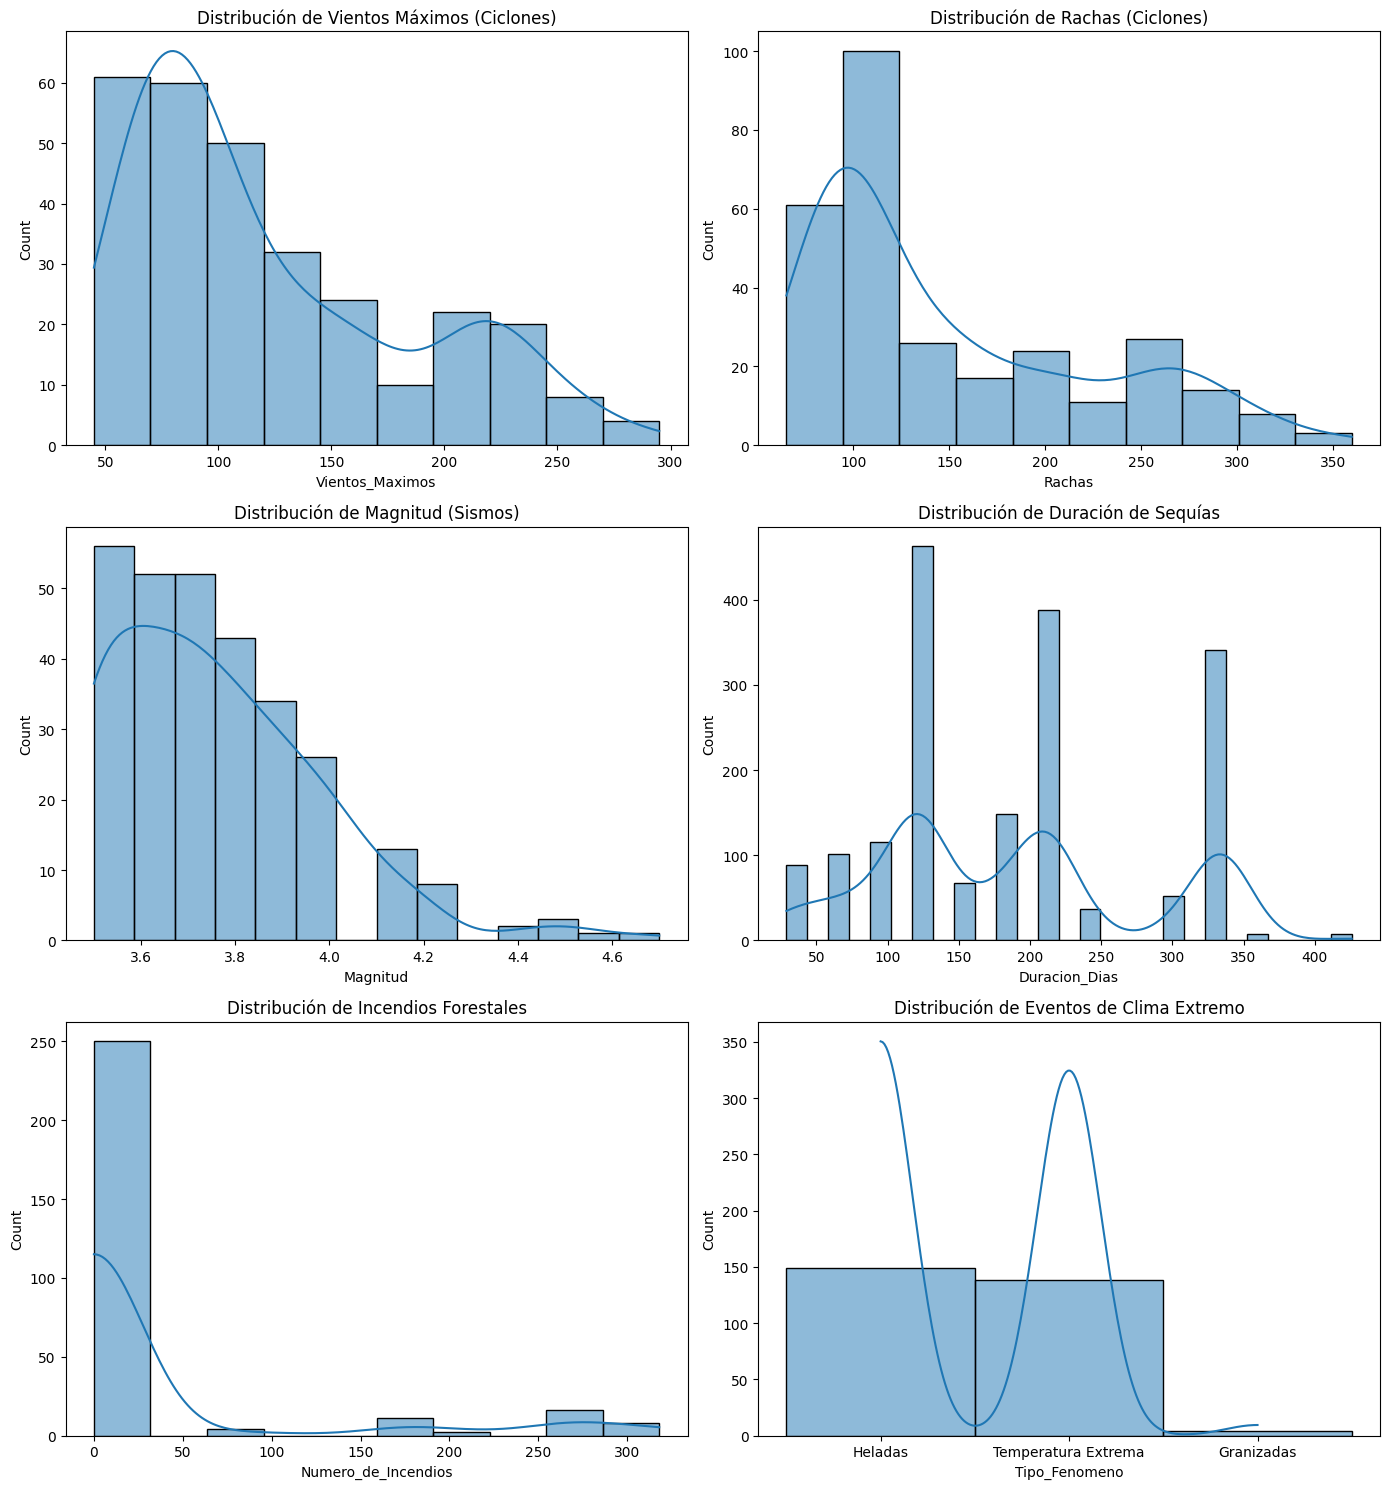

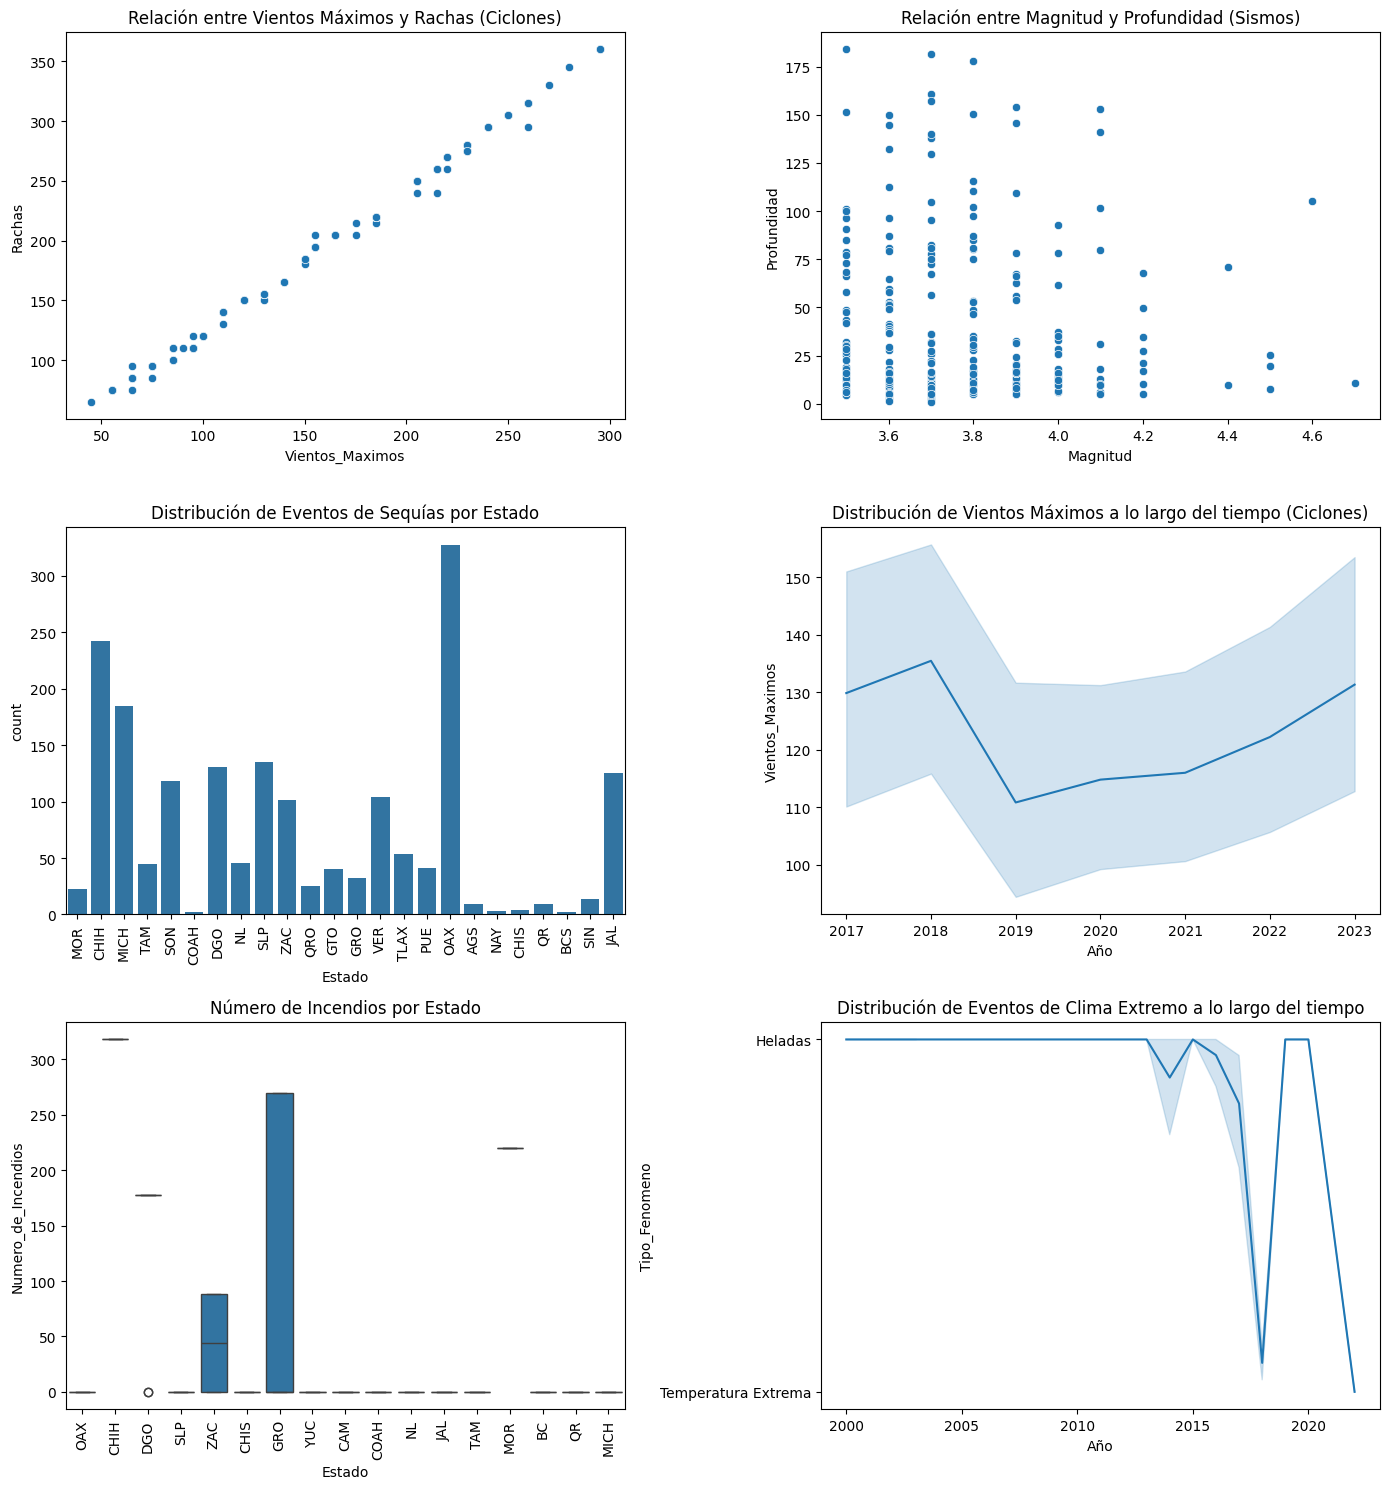

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Diccionario de abreviaturas de estados
estado_abreviaturas = {
    'Aguascalientes': 'AGS', 'Baja California': 'BC', 'Baja California Sur': 'BCS',
    'Campeche': 'CAM', 'Chiapas': 'CHIS', 'Chihuahua': 'CHIH', 'Coahuila': 'COAH',
    'Colima': 'COL', 'Durango': 'DGO', 'Guanajuato': 'GTO', 'Guerrero': 'GRO',
    'Hidalgo': 'HGO', 'Jalisco': 'JAL', 'Estado de México': 'MEX', 'Michoacán': 'MICH',
    'Morelos': 'MOR', 'Nayarit': 'NAY', 'Nuevo León': 'NL', 'Oaxaca': 'OAX',
    'Puebla': 'PUE', 'Querétaro': 'QRO', 'Quintana Roo': 'QR', 'San Luis Potosí': 'SLP',
    'Sinaloa': 'SIN', 'Sonora': 'SON', 'Tabasco': 'TAB', 'Tamaulipas': 'TAM',
    'Tlaxcala': 'TLAX', 'Veracruz': 'VER', 'Yucatán': 'YUC', 'Zacatecas': 'ZAC',
    'Ciudad de México': 'CDMX', 'Veracruz de Ignacio de la Llave': 'VER', 'Coahuila de Zaragoza': 'COAH',
    'Michoacán de Ocampo': 'MICH', 'San Luis Potosi': 'SLP', 'Yucatn': 'YUC', 'Michoacn de Ocampo': 'MICH',
    'Nuevo Leon': 'NL', 'Yucatan': 'YUC', 'MichoacÃÂ¡n': 'MICH', 'Nuevo LeÃÂ³n': 'NL', 'Nuevo LeÃn': 'NL',
    'San Luis PotosÃÂ­': 'SLP', 'YucatÂ·n': 'YUC', 'MichoacÂ·n de Ocampo': 'MICH',
    'San Luis PotosÃ': 'SLP', 'YucatÂ': 'YUC', 'MichoacÂ': 'MICH', 'MÃxico': 'MEX'
}

# Función para abreviar los nombres de los estados
def abreviar_estado(df):
    if 'Estado' in df.columns:
        df['Estado'] = df['Estado'].map(estado_abreviaturas).fillna(df['Estado'])
    return df

# Función para leer CSV con codificación correcta
def leer_csv_con_codificacion(filepath):
    try:
        df = pd.read_csv(filepath, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(filepath, encoding='latin1')
    return df

# Cargar el archivo de datos
ciclones_df_modified = pd.read_csv(filepath + 'Ciclones_Modificado.csv')
incendios_df_modified = pd.read_csv(filepath + 'Incendios_Forestales_Modificado.csv')
sismos_df_modified = pd.read_csv(filepath + 'Sismos_Modificado.csv')
sequias_df_modified = pd.read_csv(filepath + 'Sequías_Modificado.csv')
clima_extremo_df_modified = pd.read_csv(filepath + 'Clima_Extremo_Modificado.csv')

# Clean text columns
for df in [ciclones_df_modified, incendios_df_modified, sismos_df_modified, sequias_df_modified, clima_extremo_df_modified]:
    for column in df.select_dtypes(include=[object]).columns:
        df[column] = df[column].apply(clean_text)


# Renombrar la columna 'AÃ±o' a 'Año' si es necesario en todos los DataFrames
if 'AÃ±o' in ciclones_df_modified.columns:
    ciclones_df_modified.rename(columns={'AÃ±o': 'Año'}, inplace=True)
if 'AÃ±o' in clima_extremo_df_modified.columns:
    clima_extremo_df_modified.rename(columns={'AÃ±o': 'Año'}, inplace=True)

# Abreviar nombres de estados
sismos_df_modified = abreviar_estado(sismos_df_modified)
sequias_df_modified = abreviar_estado(sequias_df_modified)
incendios_df_modified = abreviar_estado(incendios_df_modified)
clima_extremo_df_modified = abreviar_estado(clima_extremo_df_modified)

# Verificar la presencia de la columna 'Estado' en cada DataFrame
print("Ciclones:", 'Estado' in ciclones_df_modified.columns)
print("Sismos:", 'Estado' in sismos_df_modified.columns)
print("Sequías:", 'Estado' in sequias_df_modified.columns)
print("Incendios Forestales:", 'Estado' in incendios_df_modified.columns)
print("Clima Extremo:", 'Estado' in clima_extremo_df_modified.columns)

# Codificar la columna 'Gravedad' de forma ordinal
def encode_gravedad(df):
    if 'Gravedad' in df.columns:
        le = LabelEncoder()
        df['Gravedad_Cod'] = le.fit_transform(df['Gravedad'])
    return df

# Aplicar la codificación a los DataFrames correspondientes
sismos_df_modified = encode_gravedad(sismos_df_modified)
sequias_df_modified = encode_gravedad(sequias_df_modified)
incendios_df_modified = encode_gravedad(incendios_df_modified)
clima_extremo_df_modified = encode_gravedad(clima_extremo_df_modified)

# Visualizar la distribución de las variables numéricas importantes
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Distribución de Vientos Máximos (Ciclones)
sns.histplot(ciclones_df_modified['Vientos_Maximos'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Vientos Máximos (Ciclones)')

# Distribución de Rachas (Ciclones)
sns.histplot(ciclones_df_modified['Rachas'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Rachas (Ciclones)')

# Distribución de Magnitud (Sismos)
sns.histplot(sismos_df_modified['Magnitud'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Magnitud (Sismos)')

# Distribución de Duración de Sequías
sns.histplot(sequias_df_modified['Duracion_Dias'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Duración de Sequías')

# Distribución de Incendios Forestales
sns.histplot(incendios_df_modified['Numero_de_Incendios'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribución de Incendios Forestales')

# Distribución de Eventos de Clima Extremo
sns.histplot(clima_extremo_df_modified['Tipo_Fenomeno'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribución de Eventos de Clima Extremo')

plt.tight_layout()
plt.show()

# Visualizar relaciones entre variables importantes
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Relación entre Vientos Máximos y Rachas (Ciclones)
sns.scatterplot(data=ciclones_df_modified, x='Vientos_Maximos', y='Rachas', ax=axes[0, 0])
axes[0, 0].set_title('Relación entre Vientos Máximos y Rachas (Ciclones)')

# Relación entre Magnitud y Profundidad (Sismos)
sns.scatterplot(data=sismos_df_modified, x='Magnitud', y='Profundidad', ax=axes[0, 1])
axes[0, 1].set_title('Relación entre Magnitud y Profundidad (Sismos)')

# Distribución de eventos de Sequías por Estado
sns.countplot(data=sequias_df_modified, x='Estado', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Eventos de Sequías por Estado')
axes[1, 0].tick_params(axis='x', rotation=90)

# Distribución de Vientos Máximos a lo largo del tiempo (Ciclones)
sns.lineplot(data=ciclones_df_modified, x='Año', y='Vientos_Maximos', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Vientos Máximos a lo largo del tiempo (Ciclones)')

# Relación entre Número de Incendios y Estado
sns.boxplot(data=incendios_df_modified, x='Estado', y='Numero_de_Incendios', ax=axes[2, 0])
axes[2, 0].set_title('Número de Incendios por Estado')
axes[2, 0].tick_params(axis='x', rotation=90)

# Distribución de eventos de Clima Extremo a lo largo del tiempo
sns.lineplot(data=clima_extremo_df_modified, x='Año', y='Tipo_Fenomeno', ax=axes[2, 1])
axes[2, 1].set_title('Distribución de Eventos de Clima Extremo a lo largo del tiempo')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


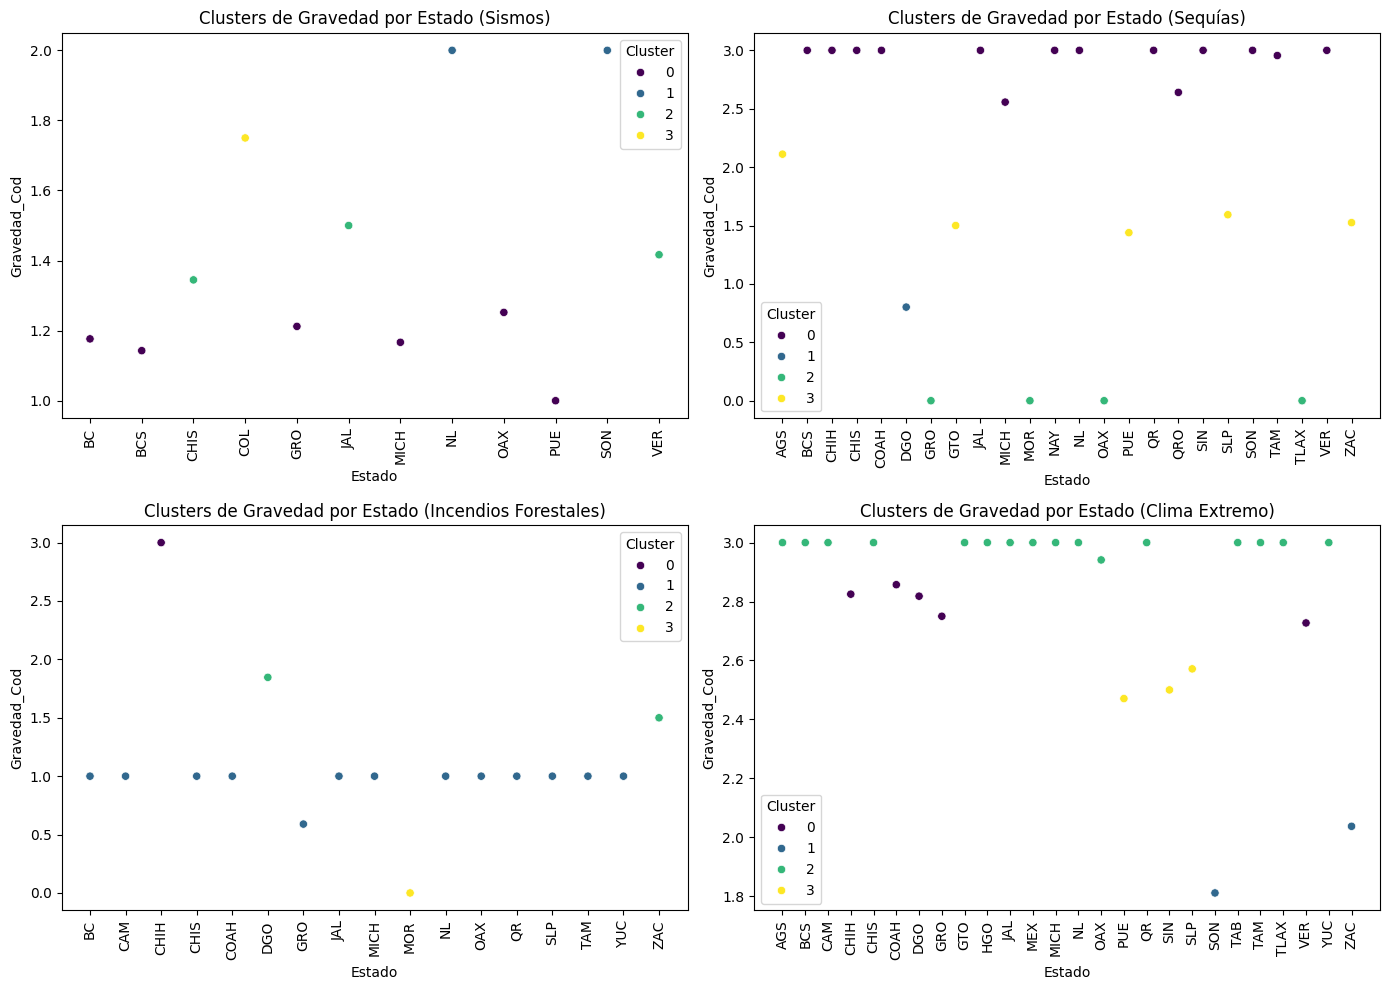

In [56]:
# K-means clustering de gravedad de eventos por estado
def kmeans_clustering(df, feature_cols, n_clusters=4):
    if 'Estado' not in df.columns:
        print(f"La columna 'Estado' no está presente en el DataFrame.")
        return pd.DataFrame()

    # Agrupar por estado y obtener la media de las características seleccionadas
    df_grouped = df.groupby('Estado')[feature_cols].mean().reset_index()

    # Normalizar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_grouped[feature_cols])

    # Aplicar K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_grouped['Cluster'] = kmeans.fit_predict(df_scaled)

    return df_grouped

# Aplicar K-means clustering para cada dataset excepto ciclones
sismos_clusters = kmeans_clustering(sismos_df_modified, ['Gravedad_Cod'])
sequias_clusters = kmeans_clustering(sequias_df_modified, ['Gravedad_Cod'])
incendios_clusters = kmeans_clustering(incendios_df_modified, ['Gravedad_Cod'])
clima_extremo_clusters = kmeans_clustering(clima_extremo_df_modified, ['Gravedad_Cod'])

# Visualizar los clusters
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Clusters de gravedad por estado (Sismos)
if not sismos_clusters.empty:
    sns.scatterplot(data=sismos_clusters, x='Estado', y='Gravedad_Cod', hue='Cluster', palette='viridis', ax=axes[0, 0])
    axes[0, 0].set_title('Clusters de Gravedad por Estado (Sismos)')
    axes[0, 0].tick_params(axis='x', rotation=90)

# Clusters de gravedad por estado (Sequías)
if not sequias_clusters.empty:
    sns.scatterplot(data=sequias_clusters, x='Estado', y='Gravedad_Cod', hue='Cluster', palette='viridis', ax=axes[0, 1])
    axes[0, 1].set_title('Clusters de Gravedad por Estado (Sequías)')
    axes[0, 1].tick_params(axis='x', rotation=90)

# Clusters de gravedad por estado (Incendios Forestales)
if not incendios_clusters.empty:
    sns.scatterplot(data=incendios_clusters, x='Estado', y='Gravedad_Cod', hue='Cluster', palette='viridis', ax=axes[1, 0])
    axes[1, 0].set_title('Clusters de Gravedad por Estado (Incendios Forestales)')
    axes[1, 0].tick_params(axis='x', rotation=90)

# Clusters de gravedad por estado (Clima Extremo)
if not clima_extremo_clusters.empty:
    sns.scatterplot(data=clima_extremo_clusters, x='Estado', y='Gravedad_Cod', hue='Cluster', palette='viridis', ax=axes[1, 1])
    axes[1, 1].set_title('Clusters de Gravedad por Estado (Clima Extremo)')
    axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## PCA

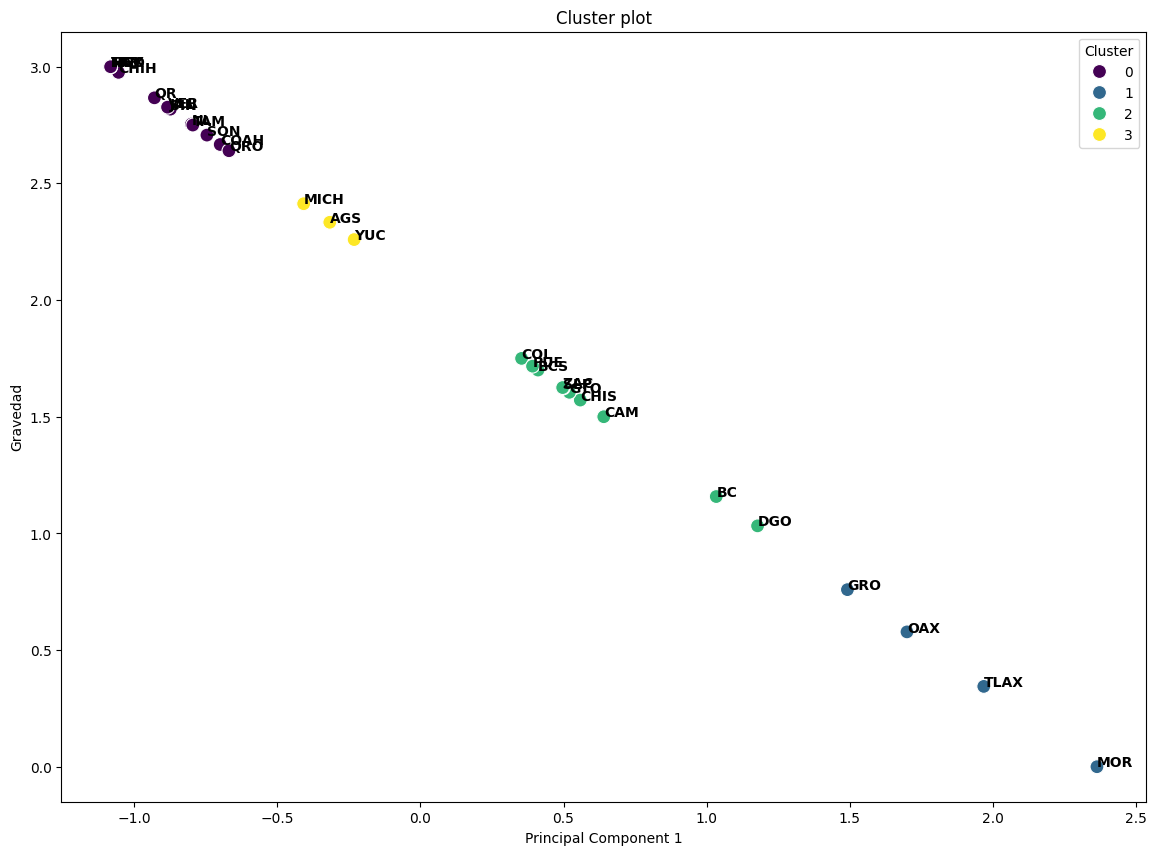

In [69]:
from sklearn.decomposition import PCA

# Unir todos los DataFrames en uno solo para clustering
dfs = [sismos_df_modified[['Estado', 'Gravedad_Cod']], sequias_df_modified[['Estado', 'Gravedad_Cod']],
       incendios_df_modified[['Estado', 'Gravedad_Cod']], clima_extremo_df_modified[['Estado', 'Gravedad_Cod']]]

# Asegurarse de que todos los DataFrames tengan datos
for df in dfs:
    if df.empty:
        print(f"El DataFrame está vacío: {df}")

# Combinar DataFrames
combined_df = pd.concat(dfs)
combined_df = combined_df.groupby('Estado').mean().reset_index()

# Normalizar los datos
scaler = StandardScaler()
combined_df_scaled = scaler.fit_transform(combined_df[['Gravedad_Cod']])

# Aplicar K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
combined_df['Cluster'] = kmeans.fit_predict(combined_df_scaled)

# Reducción de dimensionalidad con PCA (solo 1 componente posible debido a las características limitadas)
pca = PCA(n_components=1)
pca_components = pca.fit_transform(combined_df_scaled)
combined_df['PCA1'] = pca_components[:, 0]

# Visualización del clustering
plt.figure(figsize=(14, 10))
sns.scatterplot(data=combined_df, x='PCA1', y='Gravedad_Cod', hue='Cluster', palette='viridis', s=100)
for line in range(0, combined_df.shape[0]):
    plt.text(combined_df.PCA1[line], combined_df['Gravedad_Cod'][line],
             combined_df.Estado[line], horizontalalignment='left',
             size='medium', color='black', weight='semibold')
plt.title('Cluster plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Gravedad')
plt.legend(title='Cluster')
plt.show()

Silhouette Score Promedio: 0.6577336561052931


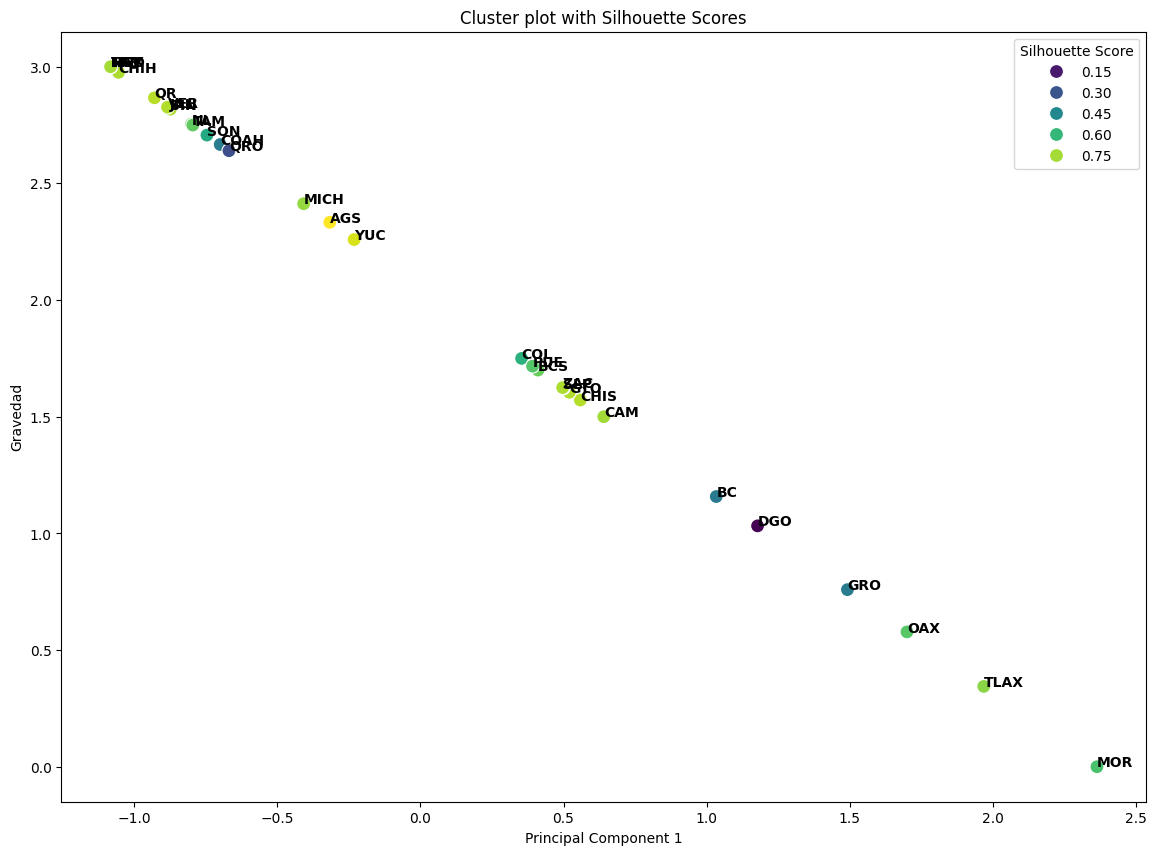

Silhouette Score Promedio: 0.6577336561052931


In [128]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Combinar DataFrames
combined_df = pd.concat(dfs)
combined_df = combined_df.groupby('Estado').mean().reset_index()

# Normalizar los datos
scaler = StandardScaler()
combined_df_scaled = scaler.fit_transform(combined_df[['Gravedad_Cod']])

# Aplicar K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
combined_df['Cluster'] = kmeans.fit_predict(combined_df_scaled)

# Reducción de dimensionalidad con PCA (solo 1 componente posible debido a las características limitadas)
pca = PCA(n_components=1)
pca_components = pca.fit_transform(combined_df_scaled)
combined_df['PCA1'] = pca_components[:, 0]

# Cálculo del Silhouette Score
silhouette_avg = silhouette_score(combined_df_scaled, combined_df['Cluster'])
print(f"Silhouette Score Promedio: {silhouette_avg}")

# Visualización de los Silhouette Scores para cada punto
sample_silhouette_values = silhouette_samples(combined_df_scaled, combined_df['Cluster'])

combined_df['Silhouette'] = sample_silhouette_values

plt.figure(figsize=(14, 10))
sns.scatterplot(data=combined_df, x='PCA1', y='Gravedad_Cod', hue='Silhouette', palette='viridis', s=100)
for line in range(0, combined_df.shape[0]):
    plt.text(combined_df.PCA1[line], combined_df['Gravedad_Cod'][line],
             combined_df.Estado[line], horizontalalignment='left',
             size='medium', color='black', weight='semibold')
plt.title('Cluster plot with Silhouette Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Gravedad')
plt.legend(title='Silhouette Score')
plt.show()

print(f"Silhouette Score Promedio: {silhouette_avg}")


# Clasificación con Datos Balanceados

In [96]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import shapefile
import numpy as np

# Función para verificar y balancear los datasets
def balance_dataset(df, target_column):
    class_counts = df[target_column].value_counts()

    if len(class_counts) < 2:
        print(f"El dataset solo tiene una clase. No se puede balancear.")
        return None

    majority_count = class_counts.max()
    balanced_df = pd.DataFrame()

    for label in df[target_column].unique():
        df_label = df[df[target_column] == label]
        if len(df_label) < majority_count:
            df_label = resample(df_label, replace=True, n_samples=majority_count, random_state=42)
        balanced_df = pd.concat([balanced_df, df_label])

    return balanced_df

# Balancear los datasets
datasets_balanced = {
    "Ciclones": balance_dataset(ciclones_df_modified, 'Gravedad'),
    "Clima Extremo": balance_dataset(clima_extremo_df_modified, 'Gravedad'),
    "Incendios Forestales": balance_dataset(incendios_df_modified, 'Gravedad'),
    "Sequías": balance_dataset(sequias_df_modified, 'Gravedad'),
    "Sismos": balance_dataset(sismos_df_modified[sismos_df['Magnitud'] >= 3.5], 'Gravedad')
}

# Filtrar los datasets que no pudieron ser balanceados
datasets_balanced = {k: v for k, v in datasets_balanced.items() if v is not None}

# Determinar el tamaño del dataset más pequeño después del filtrado
min_size = min([len(df) for df in datasets_balanced.values()])

# Balancear todos los datasets al tamaño mínimo
balanced_datasets_final = {
    name: resample(df, replace=False, n_samples=min_size, random_state=42) for name, df in datasets_balanced.items()
}

# Guardar los datasets balanceados en archivos CSV
for name, df in balanced_datasets_final.items():
    df.to_csv(filepath + f'balanced_{name}.csv', index=False)

# Mostrar la distribución de clases en los datasets balanceados finales
for name, df in balanced_datasets_final.items():
    print(f"Dataset: {name}")
    print(df['Gravedad'].value_counts())
    print("\n")

# Mostrar la distribución de clases en los datasets originales
for name, df in datasets_balanced.items():
    print(f"Dataset: {name}")
    print(df['Gravedad'].value_counts())
    print("\n")

Dataset: Ciclones
Gravedad
Alta        134
Muy Alta    132
Baja        129
Media       121
Name: count, dtype: int64


Dataset: Clima Extremo
Gravedad
Baja        137
Muy Alta    133
Media       132
Alta        114
Name: count, dtype: int64


Dataset: Incendios Forestales
Gravedad
Muy Alta    138
Media       132
Baja        129
Alta        117
Name: count, dtype: int64


Dataset: Sequías
Gravedad
Alta        143
Baja        140
Media       120
Muy Alta    113
Name: count, dtype: int64


Dataset: Sismos
Gravedad
Baja        129
Muy Alta    129
Alta        129
Media       129
Name: count, dtype: int64


Dataset: Ciclones
Gravedad
Muy Alta    171
Alta        171
Media       171
Baja        171
Name: count, dtype: int64


Dataset: Clima Extremo
Gravedad
Muy Alta    238
Baja        238
Media       238
Alta        238
Name: count, dtype: int64


Dataset: Incendios Forestales
Gravedad
Baja        250
Muy Alta    250
Media       250
Alta        250
Name: count, dtype: int64


Dataset: Sequías


In [97]:
# Función para preprocesar los datos incluyendo procesamiento de texto
def preprocess_data(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Procesamiento de texto (suponiendo que hay una columna 'Descripcion')
    if 'Descripcion' in X.columns:
        tfidf = TfidfVectorizer(stop_words='spanish')
        X_tfidf = tfidf.fit_transform(X['Descripcion'])
        X = X.drop('Descripcion', axis=1)
        X_combined = pd.concat([pd.DataFrame(X_tfidf.toarray()), X.reset_index(drop=True)], axis=1)
    else:
        X_combined = X

    # Convertir las etiquetas a valores numéricos
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Identificar las columnas categóricas
    categorical_columns = X_combined.select_dtypes(include=['object']).columns

    # Asegurarse de que las columnas categóricas no tengan valores numéricos mezclados
    for col in categorical_columns:
        X_combined[col] = X_combined[col].astype(str)

    # Definir el preprocesador
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), X_combined.select_dtypes(exclude=['object']).columns),
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_columns)
        ])

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

    # Aplicar el preprocesador
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    return X_train, X_test, y_train, y_test

In [98]:
# Función para clasificar y evaluar los modelos
def classify_and_evaluate(X_train, X_test, y_train, y_test):
    models = {
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Model: {name}")
        print(classification_report(y_test, y_pred))
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix: {name}')
        print("\n")

In [99]:
# Función para plotear la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Resultados para Ciclones
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.96      0.98        24
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        32

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

Accuracy: 0.9807692307692307


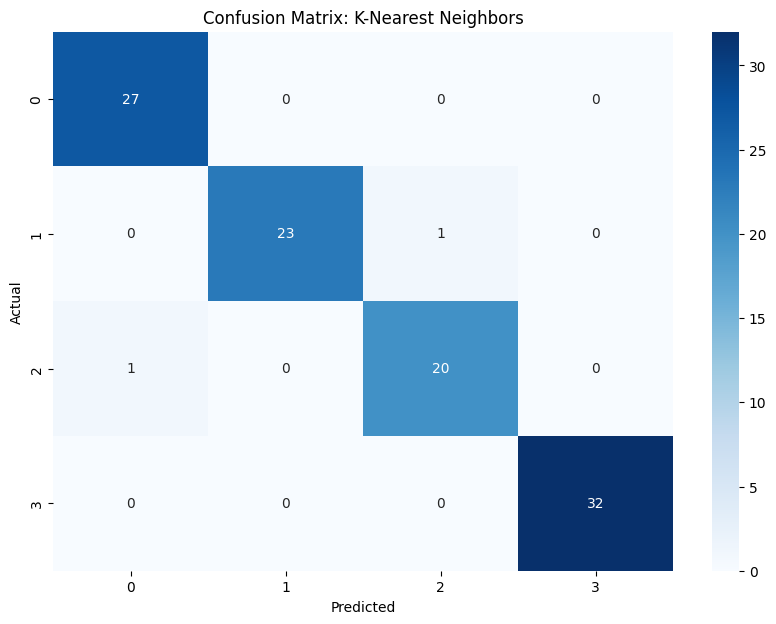





Resultados para Clima Extremo
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        33

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

Accuracy: 1.0


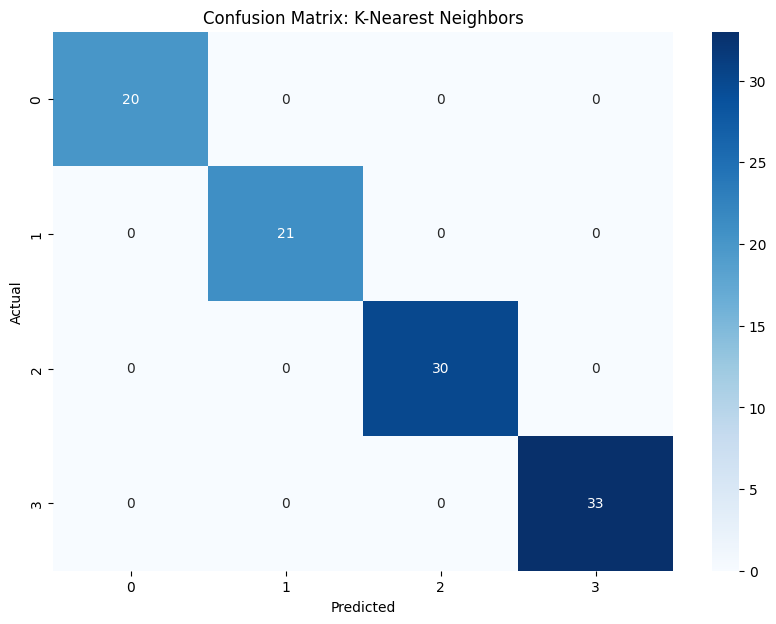





Resultados para Incendios Forestales
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        30

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

Accuracy: 1.0


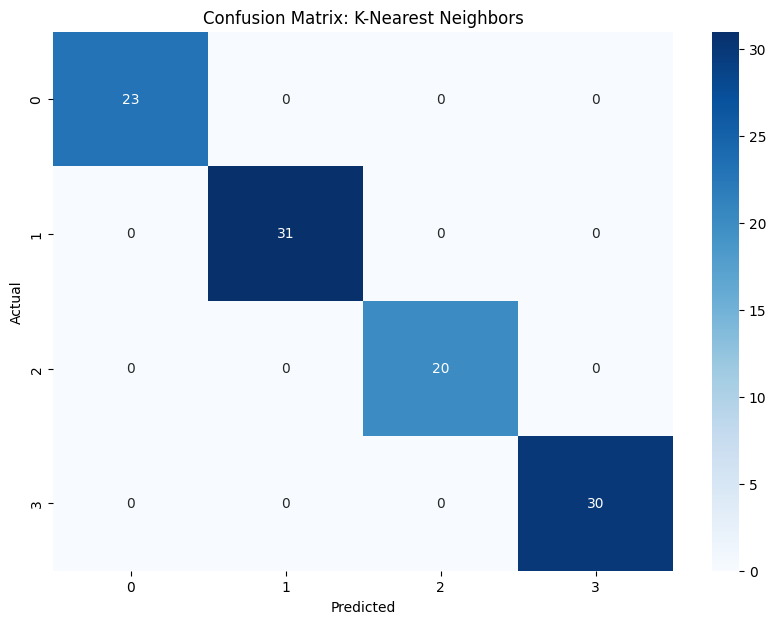





Resultados para Sequías
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        30

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

Accuracy: 1.0


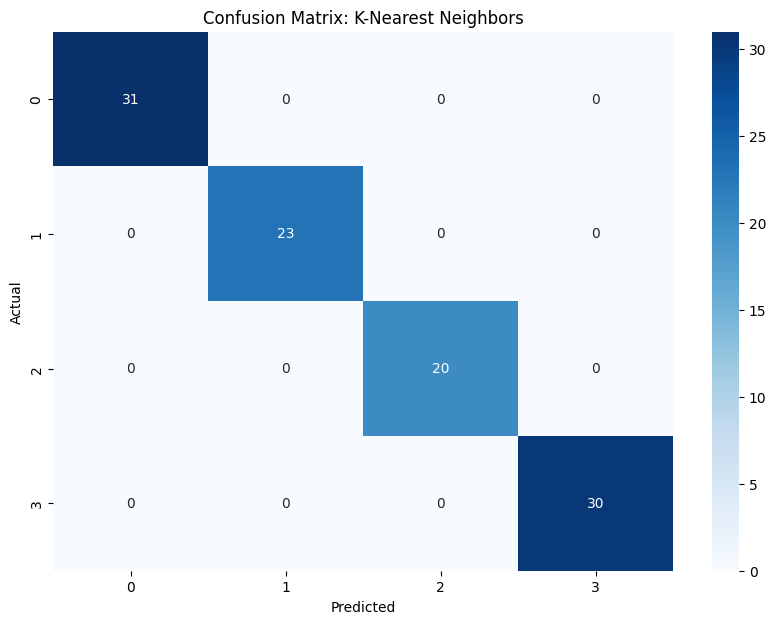





Resultados para Sismos
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.69      1.00      0.82        20
           2       1.00      0.71      0.83        34
           3       1.00      1.00      1.00        27

    accuracy                           0.90       104
   macro avg       0.91      0.93      0.91       104
weighted avg       0.93      0.90      0.90       104

Accuracy: 0.9038461538461539


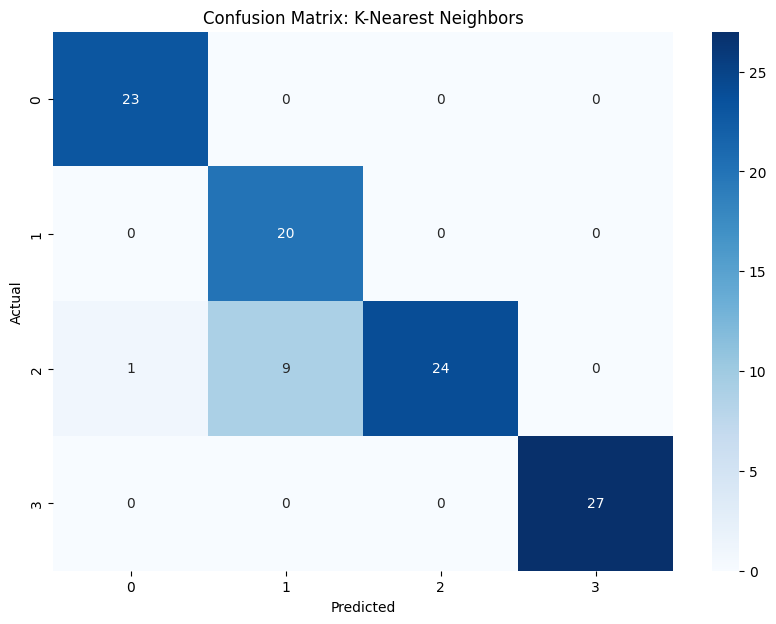

In [100]:
# Preprocesar y clasificar los datasets balanceados
for name, df in balanced_datasets_final.items():
    print(f"Resultados para {name}")
    X_train, X_test, y_train, y_test = preprocess_data(df, 'Gravedad')
    classify_and_evaluate(X_train, X_test, y_train, y_test)
    print("\n")

Epoch 1/100
8/8 [==============================] - 1s 37ms/step - loss: 1.1528 - mae: 0.9065 - val_loss: 0.7584 - val_mae: 0.7027
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7704 - mae: 0.6722 - val_loss: 0.5598 - val_mae: 0.6196
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5948 - mae: 0.6295 - val_loss: 0.5363 - val_mae: 0.6394
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4748 - mae: 0.5529 - val_loss: 0.4302 - val_mae: 0.5585
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4008 - mae: 0.5055 - val_loss: 0.3091 - val_mae: 0.4695
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3283 - mae: 0.4289 - val_loss: 0.2792 - val_mae: 0.4321
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2815 - mae: 0.3819 - val_loss: 0.2737 - val_mae: 0.4127
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2285 - mae: 0.3503 - va

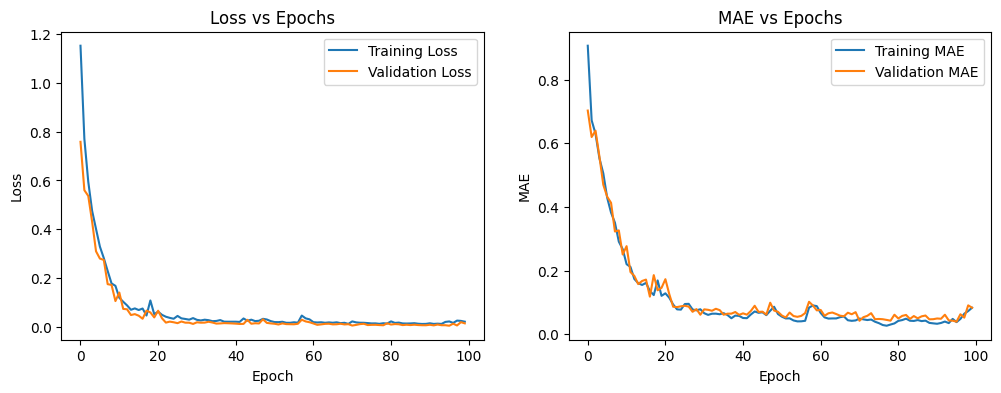

In [91]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjunto de entrenamiento y prueba
X = sismos_df_modified[['Magnitud', 'Latitud', 'Longitud', 'Profundidad']]
y = sismos_df_modified['Gravedad_Cod']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir y compilar el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo y almacenar el historial
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Función para graficar las métricas
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Función de pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs Epochs')

    # Métrica MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.title('MAE vs Epochs')

    plt.show()

# Graficar el historial de entrenamiento
plot_history(history)


# Clasificación con Datos Origen para Ciclones

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from bs4 import BeautifulSoup

filepath_DO = '/content/drive/My Drive/CIP/PRUEBA/'

In [102]:
# Fallback encoding
def read_csv_with_fallback(filepath, filename):
    try:
        return pd.read_csv(filepath_DO + filename, encoding='utf-8')
    except UnicodeDecodeError:
        return pd.read_csv(filepath_DO + filename, encoding='latin1')

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
ciclones_df_DO = read_csv_with_fallback(filepath_DO, 'Ciclones.csv')

# Preprocesamiento de los datos
X = ciclones_df_DO.drop('Gravedad', axis=1)
y = ciclones_df_DO['Gravedad']

# Convertir columnas categóricas a numéricas usando LabelEncoder
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':  # Verifica si la columna es de tipo objeto (generalmente indica datos categóricos)
        X[col] = label_encoder.fit_transform(X[col])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista de clasificadores
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'Classifier: {name}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('\n')


Classifier: Logistic Regression
[[60  1  0  0]
 [ 2  8  0  0]
 [ 0  0  0  2]
 [ 1  0  0 14]]
              precision    recall  f1-score   support

        Bajo       0.95      0.98      0.97        61
 Desconocido       0.89      0.80      0.84        10
      Fuerte       0.00      0.00      0.00         2
       Medio       0.88      0.93      0.90        15

    accuracy                           0.93        88
   macro avg       0.68      0.68      0.68        88
weighted avg       0.91      0.93      0.92        88



Classifier: K-Nearest Neighbors
[[61  0  0  0]
 [ 3  7  0  0]
 [ 0  0  0  2]
 [ 3  0  0 12]]
              precision    recall  f1-score   support

        Bajo       0.91      1.00      0.95        61
 Desconocido       1.00      0.70      0.82        10
      Fuerte       0.00      0.00      0.00         2
       Medio       0.86      0.80      0.83        15

    accuracy                           0.91        88
   macro avg       0.69      0.62      0.65        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classifier: Random Forest
[[60  1  0  0]
 [ 2  8  0  0]
 [ 0  0  2  0]
 [ 0  0  0 15]]
              precision    recall  f1-score   support

        Bajo       0.97      0.98      0.98        61
 Desconocido       0.89      0.80      0.84        10
      Fuerte       1.00      1.00      1.00         2
       Medio       1.00      1.00      1.00        15

    accuracy                           0.97        88
   macro avg       0.96      0.95      0.95        88
weighted avg       0.97      0.97      0.97        88



Classifier: SVM
[[60  1  0  0]
 [ 3  7  0  0]
 [ 0  0  0  2]
 [ 1  0  0 14]]
              precision    recall  f1-score   support

        Bajo       0.94      0.98      0.96        61
 Desconocido       0.88      0.70      0.78        10
      Fuerte       0.00      0.00      0.00         2
       Medio       0.88      0.93      0.90        15

    accuracy                           0.92        88
   macro avg       0.67      0.65      0.66        88
weighted avg       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Clasificación con Datos Preprocesados para Ciclones

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from bs4 import BeautifulSoup

filepath_PP = '/content/drive/My Drive/CIP/PRUEBA_MODIFICADOS/'

In [111]:
# Fallback encoding
def read_csv_with_fallback(filepath, filename):
    try:
        return pd.read_csv(filepath_PP + filename, encoding='utf-8')
    except UnicodeDecodeError:
        return pd.read_csv(filepath_PP + filename, encoding='latin1')

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
ciclones_df_PP = read_csv_with_fallback(filepath_PP, 'Ciclones_Modificado.csv')

# Preprocesamiento de los datos
X = ciclones_df_PP.drop('Gravedad', axis=1)
y = ciclones_df_PP['Gravedad']

# Convertir columnas categóricas a numéricas usando LabelEncoder
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista de clasificadores
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Entrenar y evaluar cada clasificador
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'Classifier: {name}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('\n')

Classifier: Logistic Regression
[[14  0  1  0]
 [ 0 57  1  0]
 [ 0  0 13  0]
 [ 1  0  0  1]]
              precision    recall  f1-score   support

        Alta       0.93      0.93      0.93        15
        Baja       1.00      0.98      0.99        58
       Media       0.87      1.00      0.93        13
    Muy Alta       1.00      0.50      0.67         2

    accuracy                           0.97        88
   macro avg       0.95      0.85      0.88        88
weighted avg       0.97      0.97      0.96        88



Classifier: K-Nearest Neighbors
[[12  0  3  0]
 [ 0 56  2  0]
 [ 0  0 13  0]
 [ 2  0  0  0]]
              precision    recall  f1-score   support

        Alta       0.86      0.80      0.83        15
        Baja       1.00      0.97      0.98        58
       Media       0.72      1.00      0.84        13
    Muy Alta       0.00      0.00      0.00         2

    accuracy                           0.92        88
   macro avg       0.64      0.69      0.66        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00        15
        Baja       1.00      1.00      1.00        58
       Media       1.00      1.00      1.00        13
    Muy Alta       1.00      1.00      1.00         2

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



Classifier: SVM
[[14  0  1  0]
 [ 0 58  0  0]
 [ 0  0 13  0]
 [ 2  0  0  0]]
              precision    recall  f1-score   support

        Alta       0.88      0.93      0.90        15
        Baja       1.00      1.00      1.00        58
       Media       0.93      1.00      0.96        13
    Muy Alta       0.00      0.00      0.00         2

    accuracy                           0.97        88
   macro avg       0.70      0.73      0.72        88
weighted avg       0.95      0.97      0.96        88



Classifier: Naive Bayes
[[15  0  0  0]
 [ 0 58  0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Gravedad  Gravedad_Cod
0  Muy Alta             3
1      Alta             0
2     Media             2
3     Media             2
4      Baja             1
Epoch 1/100
8/8 [==============================] - 3s 75ms/step - loss: 1.0810 - mae: 0.8632 - val_loss: 0.5985 - val_mae: 0.6155
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6299 - mae: 0.5865 - val_loss: 0.4146 - val_mae: 0.3764
Epoch 3/100
8/8 [==============================] - 0s 23ms/step - loss: 0.4567 - mae: 0.5232 - val_loss: 0.3364 - val_mae: 0.3883
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 0.3873 - mae: 0.4143 - val_loss: 0.3022 - val_mae: 0.3032
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.3280 - mae: 0.3299 - val_loss: 0.2823 - val_mae: 0.2412
Epoch 6/100
8/8 [==============================] - 0s 20ms/step - loss: 0.2864 - mae: 0.3053 - val_loss: 0.2537 - val_mae: 0.2767
Epoch 7/100
8/8 [==============================] - 0s 21ms/step 

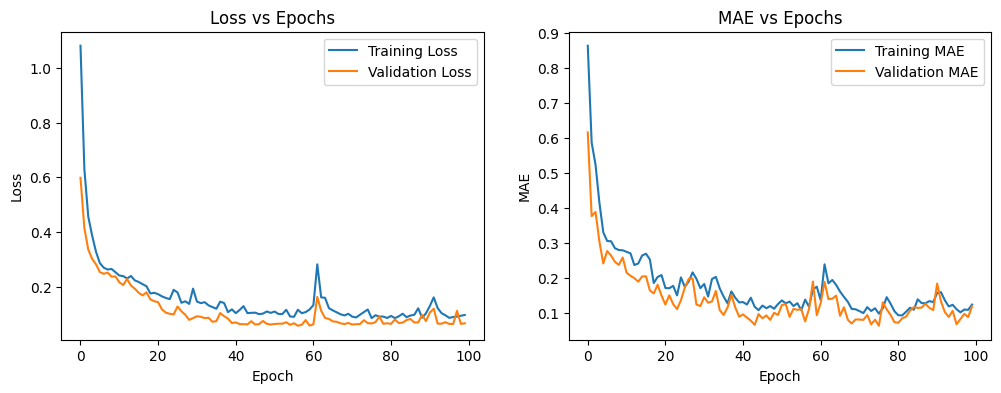

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar los datos
ciclones_df_RN = pd.read_csv(filepath_PP + 'Ciclones_Modificado.csv')

# Mapear la columna Gravedad a valores numéricos
gravedad_mapping = {'Baja': 1, 'Muy Alta': 3, 'Media': 2, 'Alta': 0}
ciclones_df_RN['Gravedad_Cod'] = ciclones_df_RN['Gravedad'].map(gravedad_mapping)

# Verificar si el mapeo se realizó correctamente
print(ciclones_df_RN[['Gravedad', 'Gravedad_Cod']].head())

# Dividir el dataset en conjunto de entrenamiento y prueba
X = ciclones_df_RN[['Vientos_Maximos', 'Rachas']]
y = ciclones_df_RN['Gravedad_Cod']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir y compilar el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo y almacenar el historial
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Función para graficar las métricas
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Función de pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs Epochs')

    # Métrica MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.title('MAE vs Epochs')

    plt.show()

# Graficar el historial de entrenamiento
plot_history(history)


                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.965909   0.968939  0.965909  0.964777  0.977778
K-Nearest Neighbors  0.920455   0.911887  0.920455  0.912494  0.883716
Decision Tree        1.000000   1.000000  1.000000  1.000000  1.000000
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000
SVM                  0.965909   0.945414  0.965909  0.955306  0.973291
Naive Bayes          1.000000   1.000000  1.000000  1.000000  1.000000


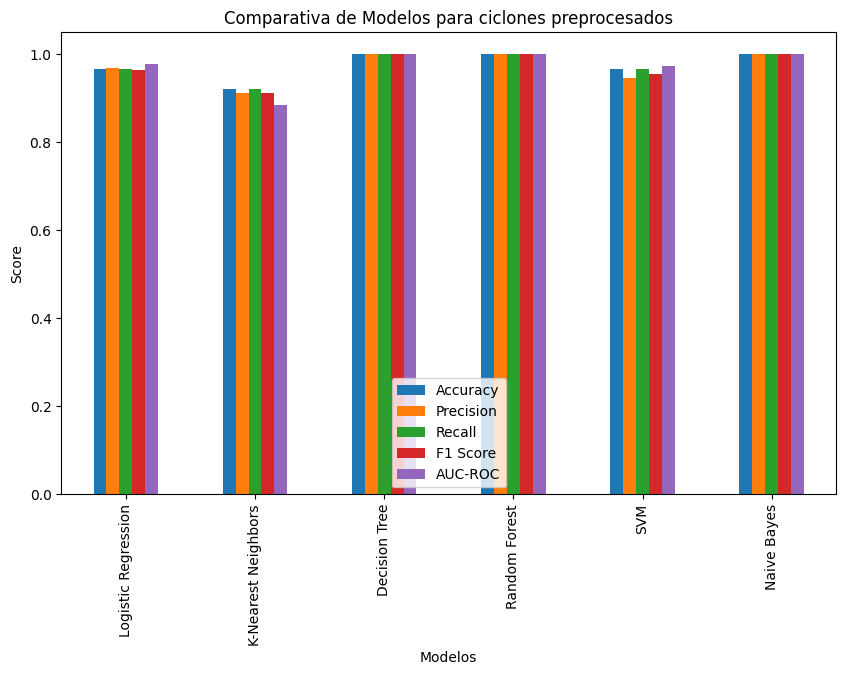

In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluación de cada modelo
results = {}
for model_name, model in classifiers.items():
    y_pred = model.predict(X_test)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)
    elif hasattr(model, 'decision_function'):
        y_prob = model.decision_function(X_test)
    elif hasattr(model, 'Neural Network'):
        y_prob = model.predict(X_test)
    else:
        y_prob = None

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }

    # Calcular AUC-ROC si las probabilidades están disponibles
    if y_prob is not None:
        if y_prob.ndim > 1 and y_prob.shape[1] > 1:
            y_prob = y_prob / y_prob.sum(axis=1, keepdims=True)
            results[model_name]['AUC-ROC'] = roc_auc_score(y_test, y_prob, multi_class='ovo')
        else:
            results[model_name]['AUC-ROC'] = roc_auc_score(y_test, y_prob)

# Mostrar los resultados en una tabla
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

# Visualización de los resultados
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparativa de Modelos para ciclones preprocesados')
plt.ylabel('Score')
plt.xlabel('Modelos')
plt.show()
